# Loading Data with Tensorflow

In [2]:
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation,Flatten
from tensorflow.keras.layers import Conv2D,MaxPooling2D
from tensorflow.keras.callbacks import TensorBoard
from keras.models import load_model

import numpy as np
import matplotlib.pyplot as plt
import os 
import cv2
import random
import pickle

In [15]:
DATADIR='C:/Users/msi/Desktop/Year 3 Sem 1/FYP 1/Data'
CATEGORIES=['Open','Close']

# Tabulating the data

In [16]:
training_data=[]

def create_training_data():
    for category in CATEGORIES:
        path=os.path.join(DATADIR,category) # path to open or close directory
        class_num=CATEGORIES.index(category)

        for image in os.listdir(path):
            try:     
                img_array=cv2.imread(os.path.join(path,image),cv2.IMREAD_GRAYSCALE)
                IMG_SIZE=50
                new_array=cv2.resize(img_array,(IMG_SIZE, IMG_SIZE))
                training_data.append([new_array,class_num])
            except Exception as e:
                pass
            
            
create_training_data()            


In [17]:
print(len(training_data))

84806


# Shuffle Data

In [18]:
random.shuffle(training_data)

In [19]:
for sample in training_data[:10]:
    print(sample[1])

0
0
1
0
1
1
1
1
1
0


In [20]:
X=[]
y=[]

for features,label in training_data:
    X.append(features)
    y.append(label)

IMG_SIZE=50
X=np.array(X).reshape(-1,IMG_SIZE,IMG_SIZE,1)


X=np.array(X)
y=np.array(y)



# Saving the Data

In [21]:
import pickle

pickle_out=open('eyeFeatures2.pickle','wb')
pickle.dump(X,pickle_out)
pickle_out.close()

pickle_out=open('eyeLabels2.pickle','wb')
pickle.dump(y,pickle_out)
pickle_out.close()



In [22]:
pickle_in = open('DGFeatures.pickle','rb')
X=pickle.load(pickle_in)


In [12]:
X[1]

array([[[ 23],
        [ 23],
        [ 26],
        ...,
        [110],
        [115],
        [114]],

       [[ 28],
        [ 29],
        [ 30],
        ...,
        [116],
        [116],
        [119]],

       [[ 27],
        [ 27],
        [ 32],
        ...,
        [117],
        [117],
        [120]],

       ...,

       [[143],
        [142],
        [148],
        ...,
        [ 45],
        [ 44],
        [ 44]],

       [[141],
        [151],
        [149],
        ...,
        [ 29],
        [ 29],
        [ 32]],

       [[148],
        [147],
        [148],
        ...,
        [ 38],
        [ 37],
        [ 36]]], dtype=uint8)

# Part 2

In [2]:
X=pickle.load(open('eyeFeatures2.pickle','rb'))
y=pickle.load(open('eyeLabels2.pickle','rb'))

In [5]:
model = keras.models.load_model('eyeModel_98acc_7loss.h5')

In [3]:
#normalise data
X=X/255.0 

In [30]:
X.shape

(84806, 50, 50, 1)

# Train Validate Split : 70 30

In [ ]:
model = Sequential()

model.add(Conv2D(256, (3, 3), input_shape=(50,50,1)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
model.add(Activation('relu'))
model.add(Dense(64))

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.fit(X, y, batch_size=32, epochs=10, validation_split=0.1)

Epoch 1/10
2386/2386 [==============================] - 24s 10ms/step - loss: 0.1824 - accuracy: 0.9314 - val_loss: 0.1481 - val_accuracy: 0.9471
Epoch 2/10
2386/2386 [==============================] - 24s 10ms/step - loss: 0.1184 - accuracy: 0.9583 - val_loss: 0.1164 - val_accuracy: 0.9592
Epoch 3/10
2386/2386 [==============================] - 24s 10ms/step - loss: 0.0967 - accuracy: 0.9672 - val_loss: 0.1017 - val_accuracy: 0.9658
Epoch 4/10
2386/2386 [==============================] - 24s 10ms/step - loss: 0.0846 - accuracy: 0.9711 - val_loss: 0.0939 - val_accuracy: 0.9692
Epoch 5/10
2386/2386 [==============================] - 24s 10ms/step - loss: 0.0761 - accuracy: 0.9742 - val_loss: 0.0800 - val_accuracy: 0.9732
Epoch 6/10
2386/2386 [==============================] - 24s 10ms/step - loss: 0.0677 - accuracy: 0.9772 - val_loss: 0.0700 - val_accuracy: 0.9762
Epoch 7/10
2386/2386 [==============================] - 24s 10ms/step - loss: 0.0629 - accuracy: 0.9783 - val_loss: 0.0682 -

### Model without normalized data

In [ ]:
model = Sequential([
    #32 convolution filters used each of size 3x3
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(50,50,1)),
    MaxPooling2D(pool_size=(1,1)),

    #32 convolution filters used each of size 3x3
    Conv2D(32,(3,3),activation='relu'),
    MaxPooling2D(pool_size=(1,1)),

    #64 convolution filters used each of size 3x3
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(1,1)),

    #dropout to reduce overfitting
    Dropout(0.25),
    #flatten the image
    Flatten(),
    #use fully connected layers from this point
    Dense(128, activation='relu'),
    #dropout again to reduce overfittinh
    Dropout(0.5),
    #output a softmax to squash the matrix into output probabilities
    Dense(1, activation='softmax')
])

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.fit(X, y, batch_size=32, epochs=10, validation_split=0.1)

Train on 76325 samples, validate on 8481 samples
Epoch 1/10
76325/76325 [==============================] - 28s 360us/sample - loss: 7.7056 - accuracy: 0.4947 - val_loss: 7.8808 - val_accuracy: 0.4832
Epoch 2/10
76325/76325 [==============================] - 24s 311us/sample - loss: 7.7056 - accuracy: 0.4947 - val_loss: 7.8808 - val_accuracy: 0.4832
Epoch 3/10
76325/76325 [==============================] - 24s 311us/sample - loss: 7.7056 - accuracy: 0.4947 - val_loss: 7.8808 - val_accuracy: 0.4832
Epoch 4/10
76325/76325 [==============================] - 24s 316us/sample - loss: 7.7056 - accuracy: 0.4947 - val_loss: 7.8808 - val_accuracy: 0.4832
Epoch 5/10
76325/76325 [==============================] - 24s 314us/sample - loss: 7.7056 - accuracy: 0.4947 - val_loss: 7.8808 - val_accuracy: 0.4832
Epoch 6/10
76325/76325 [==============================] - 24s 312us/sample - loss: 7.7056 - accuracy: 0.4947 - val_loss: 7.8808 - val_accuracy: 0.4832
Epoch 7/10
76325/76325 [=====================

In [6]:
model.save('eyeModel_98acc_7loss.h5', overwrite=True)

## Split Data Training

In [38]:
model = Sequential()

model.add(Conv2D(256, (3, 3), input_shape=(50,50,1)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
model.add(Activation('relu'))
model.add(Dense(64))
model.add(Dropout(0.25))

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.fit(X, y, batch_size=32, epochs=10, validation_split=0.3)

Epoch 1/10
219/219 [==============================] - 3s 12ms/step - loss: 0.3897 - accuracy: 0.8231 - val_loss: 0.2446 - val_accuracy: 0.9093
Epoch 2/10
219/219 [==============================] - 3s 11ms/step - loss: 0.2475 - accuracy: 0.9039 - val_loss: 0.1925 - val_accuracy: 0.9213
Epoch 3/10
219/219 [==============================] - 3s 12ms/step - loss: 0.2015 - accuracy: 0.9267 - val_loss: 0.1784 - val_accuracy: 0.9320
Epoch 4/10
219/219 [==============================] - 3s 12ms/step - loss: 0.1935 - accuracy: 0.9320 - val_loss: 0.1743 - val_accuracy: 0.9387
Epoch 5/10
219/219 [==============================] - 3s 11ms/step - loss: 0.1786 - accuracy: 0.9376 - val_loss: 0.1758 - val_accuracy: 0.9347
Epoch 6/10
219/219 [==============================] - 3s 12ms/step - loss: 0.1692 - accuracy: 0.9389 - val_loss: 0.1782 - val_accuracy: 0.9380
Epoch 7/10
219/219 [==============================] - 3s 12ms/step - loss: 0.1671 - accuracy: 0.9427 - val_loss: 0.1688 - val_accuracy: 0.9413

In [40]:
model.metrics.accuracy()

AttributeError: 'list' object has no attribute 'accuracy'

# Load Model

In [2]:
model = tf.keras.models.load_model('eyeModel_98acc_7loss.h5')

In [3]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 48, 48, 256)       2560      
_________________________________________________________________
activation (Activation)      (None, 48, 48, 256)       0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 24, 24, 256)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 22, 22, 256)       590080    
_________________________________________________________________
activation_1 (Activation)    (None, 22, 22, 256)       0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 11, 11, 256)       0         
_________________________________________________________________
flatten (Flatten)            (None, 30976)             0

array([[91, 93, 89, ..., 51, 50, 48],
       [92, 92, 94, ..., 49, 51, 48],
       [94, 96, 98, ..., 49, 48, 49],
       ...,
       [64, 63, 65, ..., 64, 62, 59],
       [62, 63, 63, ..., 64, 62, 61],
       [64, 63, 61, ..., 64, 63, 61]], dtype=uint8)

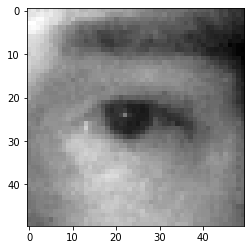

In [12]:
img=cv2.imread('C:/Users/msi/Desktop/Year 3 Sem 1/FYP 1/Data/Open/s0001_01866_0_0_1_0_0_01.png')
#img=cv2.imread('C:/Users/msi/Desktop/Year 3 Sem 1/FYP 1/Data/Close/s0001_00001_0_0_0_0_0_01.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img = cv2.resize(img,(50,50))

plt.imshow(img,cmap='gray')
img


# img=img.reshape(50,50,1)
# img = np.expand_dims(img,axis=0)

array([[0.35686275, 0.36470588, 0.34901961, ..., 0.2       , 0.19607843,
        0.18823529],
       [0.36078431, 0.36078431, 0.36862745, ..., 0.19215686, 0.2       ,
        0.18823529],
       [0.36862745, 0.37647059, 0.38431373, ..., 0.19215686, 0.18823529,
        0.19215686],
       ...,
       [0.25098039, 0.24705882, 0.25490196, ..., 0.25098039, 0.24313725,
        0.23137255],
       [0.24313725, 0.24705882, 0.24705882, ..., 0.25098039, 0.24313725,
        0.23921569],
       [0.25098039, 0.24705882, 0.23921569, ..., 0.25098039, 0.24705882,
        0.23921569]])

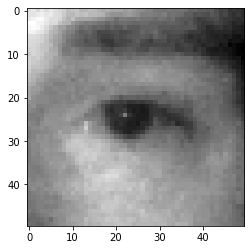

In [13]:
img2=img/255.0
plt.imshow(img2,cmap='gray')
img2